Dataset loaded successfully!

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             545 non-null    int64  
 1   Size              545 non-null    int64  
 2   Number of Rooms   545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
 13  Unnamed: 13       0 non-null      float64
 14  Location          545 non-null    object 
dtypes: float64(1), int64(6), object(8)
memor

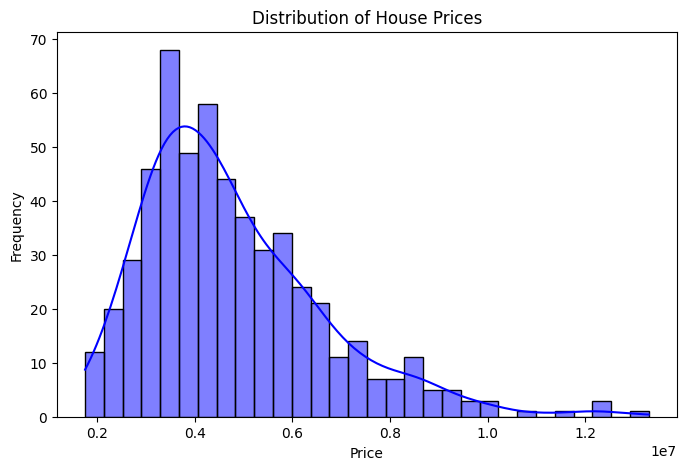

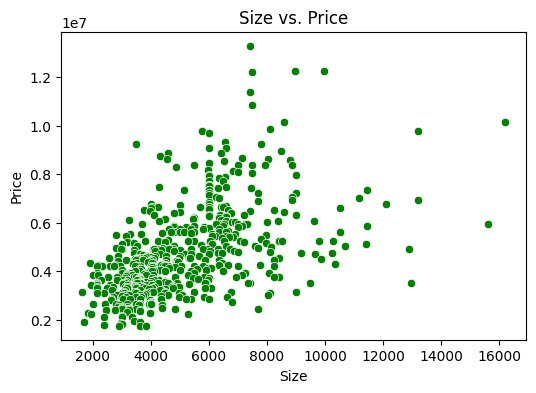

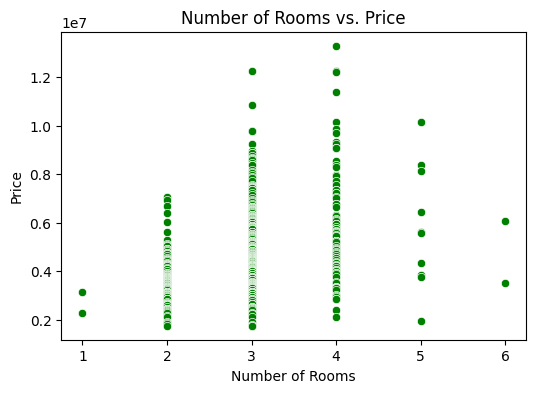

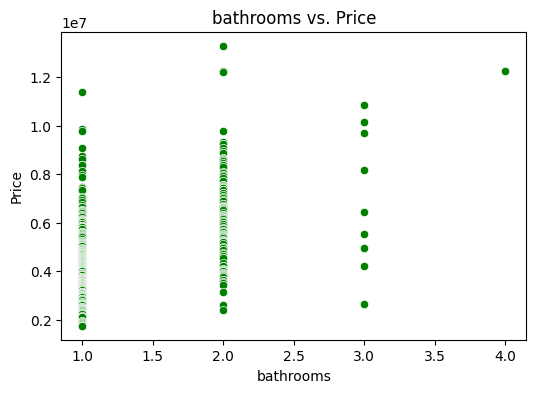

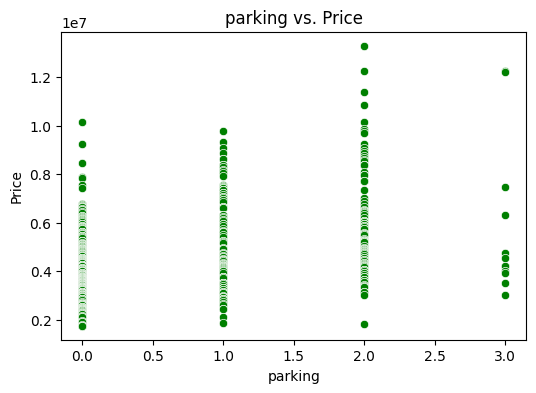

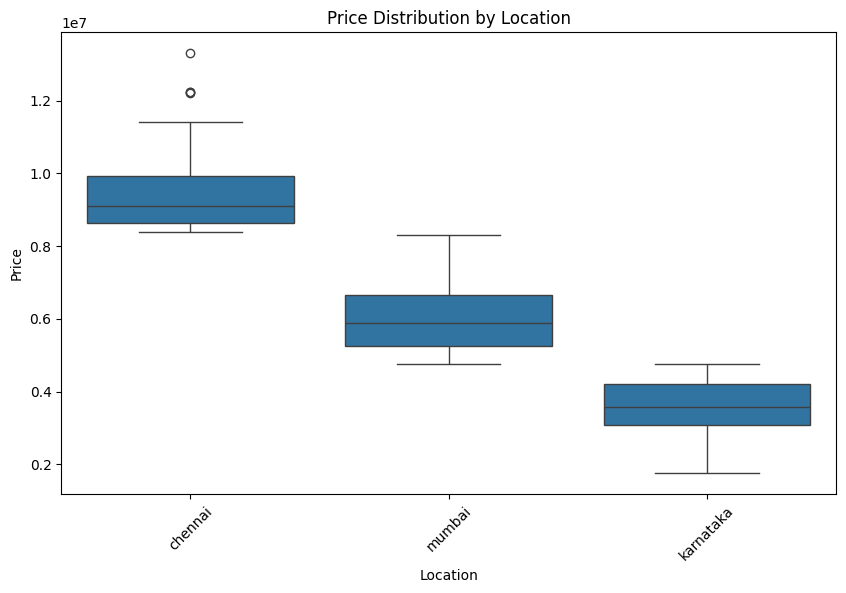

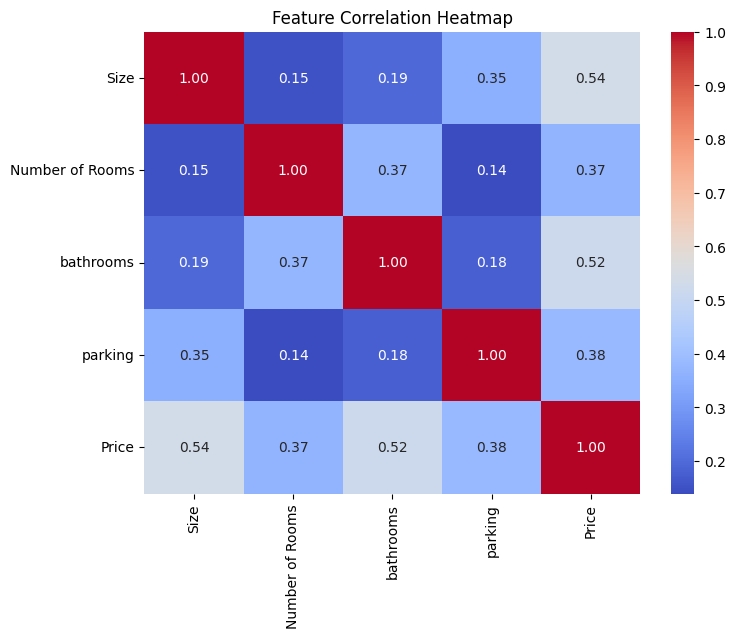


Root Mean Square Error (RMSE): 860690.1931844868
R-squared (R²): 0.8534420192938342

Feature Importance (sorted by Coefficient):
              Feature   Coefficient
4    Location_chennai  2.609225e+06
2           bathrooms  2.223843e+05
0                Size  1.953325e+05
3             parking  1.356846e+05
1     Number of Rooms  7.088635e+04
6     Location_mumbai -3.438330e+05
5  Location_karnataka -2.265392e+06


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Function to load dataset with error handling
def load_dataset(file_path):
    """Load dataset from the provided file path with error handling."""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}. Please check the path and ensure the file exists.")
    return pd.read_csv(file_path)

# Step 1: Set file path and load dataset
file_path = r"C:\Users\deepi\OneDrive\Documents\house_prices.csv"
try:
    df = load_dataset(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError as e:
    print(e)
    exit()

# Step 2: Explore Dataset
print("\nDataset Information:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
print("\nMissing Values in Dataset:")
print(df.isnull().sum())  # Check for missing values

# Check the column names to ensure they're correct
print("\nColumn Names in the Dataset:")
print(df.columns)

# Step 3: Feature Engineering
numerical_features = ['Size', 'Number of Rooms', 'bathrooms', 'parking']
categorical_features = ['Location']
target = 'Price'

# Validate that the columns exist in the dataset
missing_columns = [col for col in numerical_features + categorical_features if col not in df.columns]
if missing_columns:
    raise KeyError(f"Columns not found in the dataset: {', '.join(missing_columns)}")

# Visualize the dataset before preprocessing

# 1. Distribution of Target Variable (Price)
plt.figure(figsize=(8, 5))
sns.histplot(df[target], bins=30, kde=True, color='blue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# 2. Scatter plots for numerical features vs. Price
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df[target], color='green')
    plt.title(f"{col} vs. Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

# 3. Box Plot for Categorical Feature (Location) vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Location'], y=df['Price'])
plt.xticks(rotation=45)
plt.title("Price Distribution by Location")
plt.xlabel("Location")
plt.ylabel("Price")
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features + [target]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 4: Define Preprocessing Pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 5: Prepare Data (X and y)
X = df[numerical_features + categorical_features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build and Train Model using Pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'\nRoot Mean Square Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Step 9: Feature Importance
coefficients = model.named_steps['regressor'].coef_
feature_names = numerical_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print("\nFeature Importance (sorted by Coefficient):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))
